Summary:
* pH was not predictive at all against both training and test data
* pH + density was also not predictive
* Using all data points the training set had a performance measure of around 37%, while the test set 
  faired around 32%


None of our models were very strong even when using all data points. If we had more time we would try more permutations of variables to get a more predictive model. 

In [1]:
import pandoc
import pandas as pd

red_wine_data = pd.read_csv('winequality-red.csv', sep=';')

In [124]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [129]:
red_wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [130]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [132]:
from pathlib import Path
import matplotlib.pyplot as plt
#pyplot is an interface (still a module though)
#Artist is any element that is drawn on a figure

IMAGES_PATH = Path() / 'images' / 'end_to_end_project'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

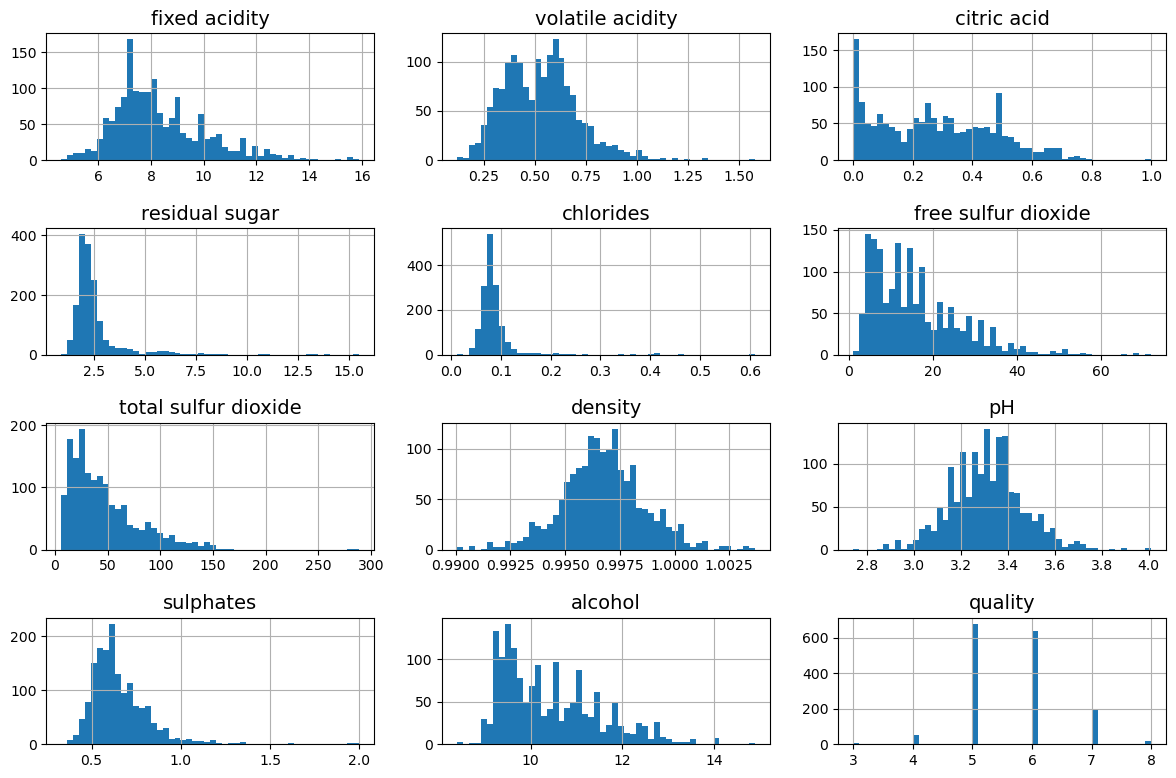

In [133]:
#how to configure global Matplotlib style settings for a consistent appearance across all plots
#plt.rc sets global properties for various Matplotlib elements
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

red_wine_data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [ ]:
# import numpy as np

# def shuffle_and_split_data(data, test_ratio):
#     #randomize order of rows (shuffle dataframe) 
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indecies[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [153]:
from sklearn.model_selection import train_test_split

#decide independent vs dependent
#dependent = quality

# X = red_wine_data.drop(['quality' 'fixed acidity'], axis=1)
my_series = red_wine_data['pH']
X = my_series.to_frame()
y = red_wine_data['quality']
#does same thing as cell above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [159]:
X_train.head(1599)

,pH
1383,3.30
1096,3.35
46,3.25
904,3.41
384,3.42
...,...
586,3.12
1082,3.42
1490,3.39
1292,3.62


In [161]:
from sklearn.linear_model import LinearRegression

#instance of class
model = LinearRegression()
#train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#coeff
print('Coefficients:', *model.coef_, sep='\n')
print('Intercept:', model.intercept_)

Coefficients:
-0.34795136153313877
Intercept: 6.787341935017325


In [165]:
model.score(X_train, y_train)

0.004457011891625395

In [167]:
#tells us how accurate
model.score(X_test, y_test)

-0.0015150764242801706

In [119]:
# import numpy as np
# x = 
# m = model.coef_[8]
# b = model.intercept_
# m, b = np.polyfit(X_test.pop('pH'), y_predict, 1)
# plt.plot(X_test['pH'], m*X_test['pH'] + b)
# plt.show()

KeyError: 'pH'

In [175]:
X = red_wine_data[['pH', 'density']]
y = red_wine_data['quality']
#does same thing as cell above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instance of class
model = LinearRegression()
#train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#coeff
print('Coefficients:', *model.coef_, sep='\n')
print('Intercept:', model.intercept_)

model.score(X_train, y_train)



Coefficients:
-0.7607169045129971
-94.65740273316416
Intercept: 102.49499808340725


0.049441946538990145

In [177]:
#tells us how accurate
model.score(X_test, y_test)

0.03065580401453305

In [183]:
X = red_wine_data.drop('quality', axis=1)
y = red_wine_data['quality']
#does same thing as cell above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instance of class
model = LinearRegression()
#train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#coeff
print('Coefficients:', *model.coef_, sep='\n')
print('Intercept:', model.intercept_)

model.score(X_train, y_train)

Coefficients:
0.03813687677314887
-1.0397673104428917
-0.20714744692832643
0.01759258814623869
-1.22896723651316
0.003267438367030162
-0.0025075476409367418
-19.669338833791038
-0.2652471505979277
0.8220612775394462
0.29657133017290804
Intercept: 22.898460475800054


0.3697935585044759

In [185]:
#tells us how accurate
model.score(X_test, y_test)

0.31651476265527356